Taken heavily/entirely from https://www.kaggle.com/poonaml/deep-neural-network-keras-way
    with own comments and minor testing

In [1]:
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
jtplot.style(ticks=True, grid=False, figsize=(8, 6))

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


The purpose of this notebook is to (correctly) identify digits from the MNIST dataset of handwritten digits/numbers. To accomplish this feat, Keras is used.

# Load training data

In [3]:
# load csv file as pandas dataframe
trainingSet = pd.read_csv("train.csv")

## Checking data

In [4]:
# checking that column names loaded correctly
print(trainingSet.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [5]:
# checking that types make sense
print(trainingSet.dtypes.values)

[dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('i

## Inspecting an image

Text(0.5,1,'Digit is a 0')

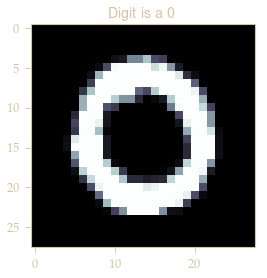

In [6]:
# can arbitrarily set
img_num = 1

label = trainingSet.iloc[img_num, 0]
img = trainingSet.iloc[img_num, 1:].values
img = img.reshape((28,28))
plt.imshow(img, cmap="bone", origin="upper", aspect="equal")
plt.title("Digit is a %s" % label)

Text(0,0.5,'Count')

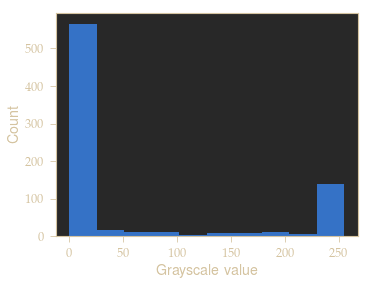

In [7]:
plt.hist(img.flatten())
plt.xlabel("Grayscale value")
plt.ylabel("Count")

# Preprocessing image data

In [4]:
# splitting into data (images) and labels
# use arrays not dataframes
labels = trainingSet.iloc[:, 0].values
images = trainingSet.iloc[:, 1:].values

## Assemble pixels in image format

In [5]:
images_training = images.reshape(images.shape[0], 28,28, 1)
images_training.shape

(42000, 28, 28, 1)

## Feature standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
pixels = images_training.reshape(-1,1)
scaler.fit(pixels)

/home/ariel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
mean_px = images_training.mean()
std_px = images_training.std()

def standardize(x):
    """Standardizes features by removing mean and scaling to unit variance"""
    return (x-mean_px)/std_px

## One-hot encoder

In [7]:
# one-hot vector: encoding categorical information into a vector usable by ML algorithms
labels_training = to_categorical(labels)
print(labels_training[:3])
print(labels_training.shape[1])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
10


## Spliting up data into train/test sets

In [8]:
# dividing up images and labels
X_train, X_test, y_train, y_test = train_test_split(images_training, labels_training, test_size=0.2)

# Neural network architectures

## Basic network (1 connected layer)

In [10]:
# fix seed for reproducibility
np.random.seed(43)

In [11]:
from keras.models import  Sequential
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [12]:
# Keras' sequential is a linear stack of layers
model = Sequential()

# Lambda performs arithmetic operations
model.add(Lambda(standardize, input_shape=(28,28,1)))

# transforms into 1D array, as expected
model.add(Flatten())

# dense = fully connected layer (all layers from previous layers connected to all neurons)
# need to specify output dimensions/classes -> 10
model.add(Dense(10, activation='softmax'))

print("input shape ", model.input_shape)
print("output shape ", model.output_shape)          

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [13]:
from keras.optimizers import RMSprop

# optimizer to update network with more data and reduce loss
# learning rate set low (default value)
model.compile(optimizer=RMSprop(lr=0.001),

# loss function to measure how good network is
loss='categorical_crossentropy',

# to measure/monitor network performance
metrics=['accuracy'])

In [14]:
from keras.preprocessing import image

# generates batches of tensor image data with real-time data augmentation
gen = image.ImageDataGenerator()

In [15]:
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_test, y_test, batch_size=64)

In [22]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                              validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
33600/33600 [==============================] - 164s 5ms/step - loss: 0.2386 - acc: 0.9344 - val_loss: 0.3260 - val_acc: 0.9130
Epoch 2/3
33600/33600 [==============================] - 160s 5ms/step - loss: 0.2115 - acc: 0.9430 - val_loss: 0.3598 - val_acc: 0.9124
Epoch 3/3
33600/33600 [==============================] - 159s 5ms/step - loss: 0.2041 - acc: 0.9452 - val_loss: 0.3839 - val_acc: 0.9062


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,1,'Loss over epochs')

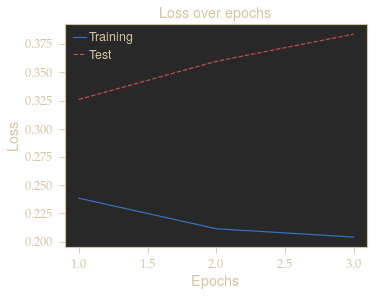

In [26]:
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'b-', label="Training")
plt.plot(epochs, history_dict['val_loss'], 'r--', label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over epochs")

Text(0.5,1,'Accuracy over epochs')

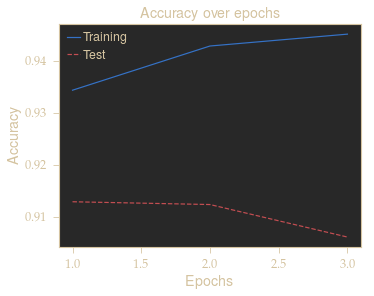

In [27]:
plt.plot(epochs, history_dict['acc'], 'b-', label="Training")
plt.plot(epochs, history_dict['val_acc'], 'r--', label="Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over epochs")

## Network (2 connected layers)

In [31]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer='Adam', loss='categorical_crossentropy', 
                  metrics=["accuracy"])
    
    return model

In [32]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [37]:
history = fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                           validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
33600/33600 [==============================] - 518s 15ms/step - loss: 0.2220 - acc: 0.9834 - val_loss: 0.5499 - val_acc: 0.9650
Epoch 2/3
33600/33600 [==============================] - 519s 15ms/step - loss: 0.2826 - acc: 0.9818 - val_loss: 0.5878 - val_acc: 0.9630
Epoch 3/3
33600/33600 [==============================] - 581s 17ms/step - loss: 0.2932 - acc: 0.9814 - val_loss: 0.5595 - val_acc: 0.9648


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,1,'Loss over epochs')

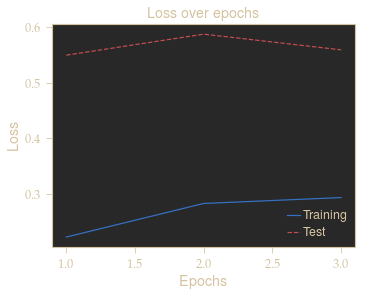

In [39]:
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'b-', label="Training")
plt.plot(epochs, history_dict['val_loss'], 'r--', label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over epochs")

Text(0.5,1,'Accuracy over epochs')

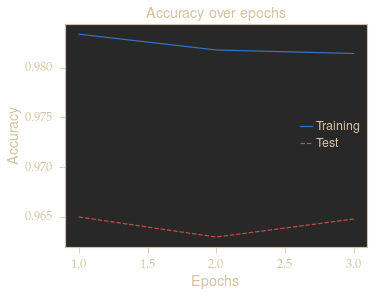

In [40]:
plt.plot(epochs, history_dict['acc'], 'b-', label="Training")
plt.plot(epochs, history_dict['val_acc'], 'r--', label="Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over epochs")

## CNN

In [16]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3,3), activation="relu"),
        Convolution2D(32, (3,3), activation="relu"),
        MaxPooling2D(),
        Convolution2D(64, (3,3), activation="relu"),
        Convolution2D(64, (3,3), activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [44]:
model = get_cnn_model()
model.optimizer.lr=0.01

In [49]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
                             validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
33599/33600 [============================>.] - ETA: 0s - loss: 0.0696 - acc: 0.9807

KeyboardInterrupt: 

## CNN with batch normalization

In [17]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32, (3,3), activation="relu"),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation="relu"),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation="relu"),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [18]:
model = get_bn_model()
model.optimizer.lr = 0.01
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
            validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
33600/33600 [==============================] - 26275s 782ms/step - loss: 0.0247 - acc: 0.9944 - val_loss: 0.0989 - val_acc: 0.9915


## Predictions for Kaggle

In [26]:
test = pd.read_csv("test.csv")
print(test.head())
print(test.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [29]:
test_imgs = test.iloc[:, :].values
test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)
test_imgs.shape

(28000, 28, 28, 1)

In [30]:
predictions = model.predict_classes(test_imgs, verbose=0)

In [31]:
submissions = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)), "Label":predictions})

In [32]:
submissions.to_csv("DR.csv", index=False, header=True)